In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dtype_dict = {"season_id" : int}
data = pd.read_csv('data/game.csv', dtype=dtype_dict)
data = data[data['season_id'] >= 21985]
data.columns

Index(['season_id', 'team_id_home', 'team_abbreviation_home', 'team_name_home',
       'game_id', 'game_date', 'matchup_home', 'wl_home', 'min', 'fgm_home',
       'fga_home', 'fg_pct_home', 'fg3m_home', 'fg3a_home', 'fg3_pct_home',
       'ftm_home', 'fta_home', 'ft_pct_home', 'oreb_home', 'dreb_home',
       'reb_home', 'ast_home', 'stl_home', 'blk_home', 'tov_home', 'pf_home',
       'pts_home', 'plus_minus_home', 'video_available_home', 'team_id_away',
       'team_abbreviation_away', 'team_name_away', 'matchup_away', 'wl_away',
       'fgm_away', 'fga_away', 'fg_pct_away', 'fg3m_away', 'fg3a_away',
       'fg3_pct_away', 'ftm_away', 'fta_away', 'ft_pct_away', 'oreb_away',
       'dreb_away', 'reb_away', 'ast_away', 'stl_away', 'blk_away', 'tov_away',
       'pf_away', 'pts_away', 'plus_minus_away', 'video_available_away'],
      dtype='object')

Categorical features and preprocessing:
* Team ID: one-hot encoding
* Season ID: one-hot encoding

Models:
* Logistic Regression
* SVC
* MLP
* RNN

In [3]:
data.drop(columns=['video_available_home', 'video_available_away'], axis=1, inplace=True)
data['team_abbreviation_home'].unique()

print(15 * 82 * (2023-1985))

46740


In [4]:
# group the dataframe by season_id
grouped = data.groupby('season_id')

# create a dictionary of dataframes, where each key is a unique season_id and the corresponding value is the subset of the original dataframe for that season
season_dfs = {}
for season_id, group in grouped:
    season_dfs[season_id] = group.copy()

for season_id, season_df in season_dfs.items():
    season_df.to_csv(f"data/season_split/{season_id}.csv", index=False)

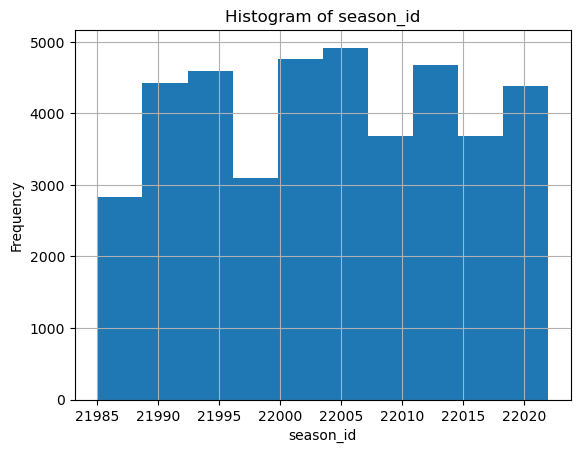

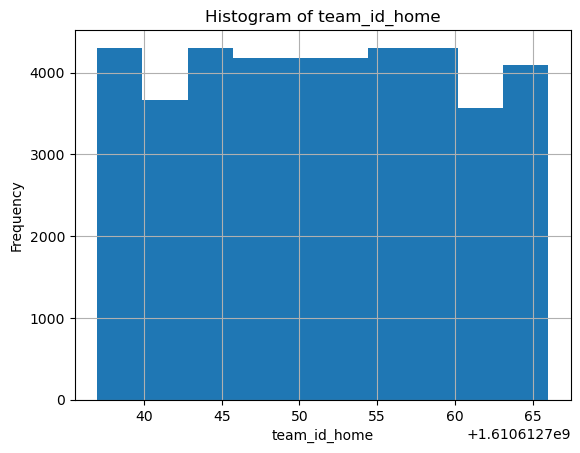

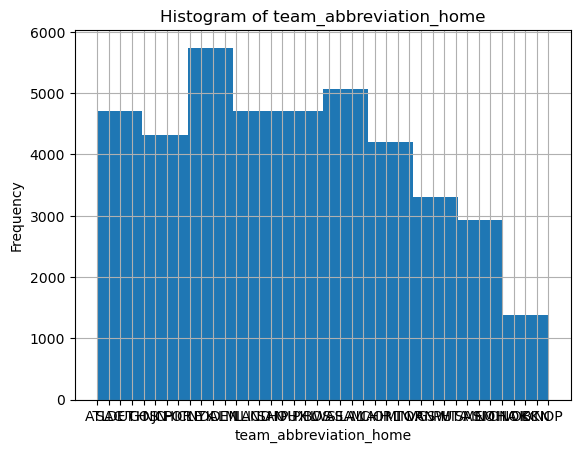

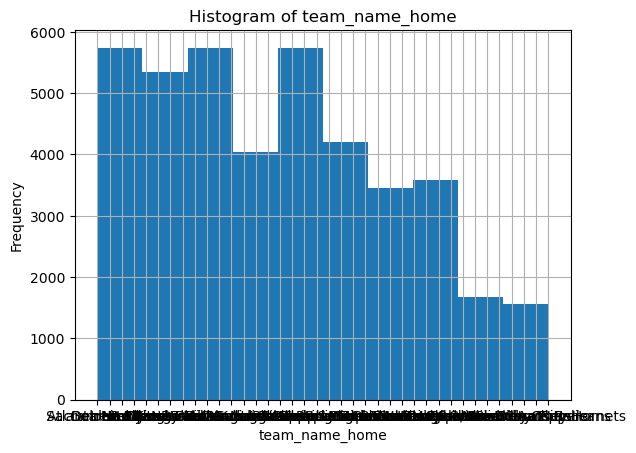

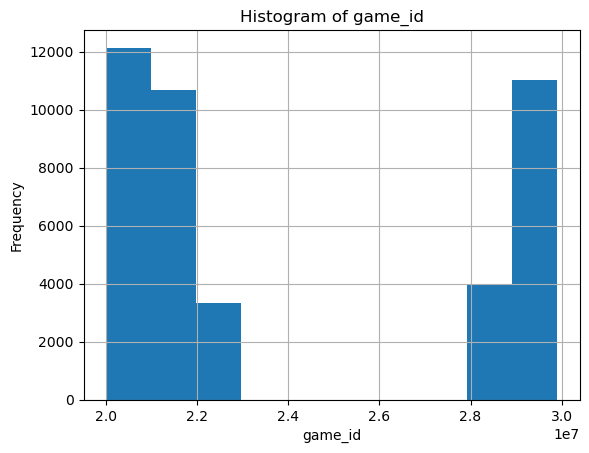

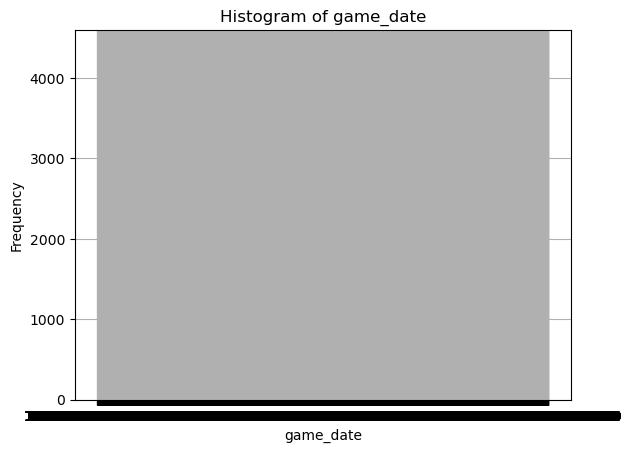

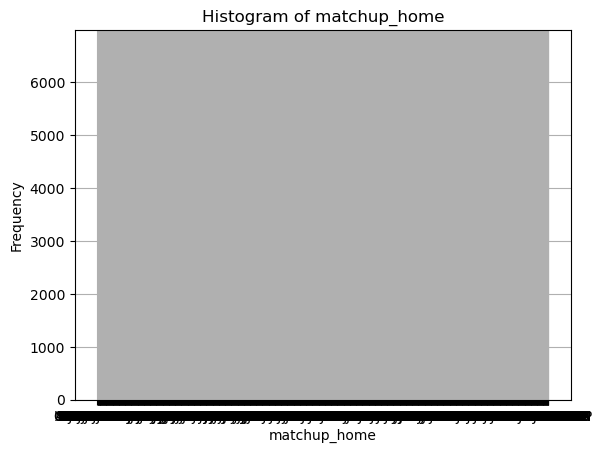

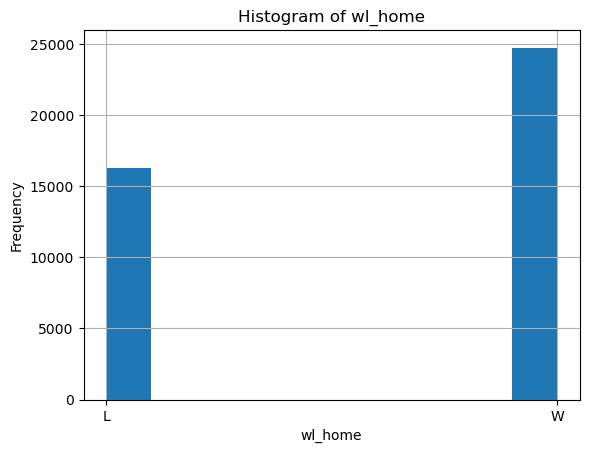

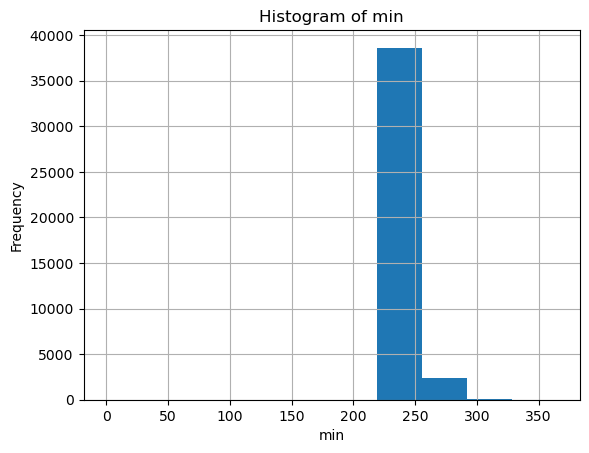

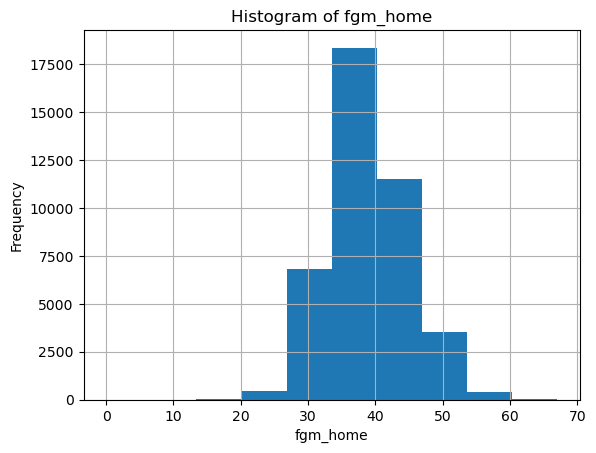

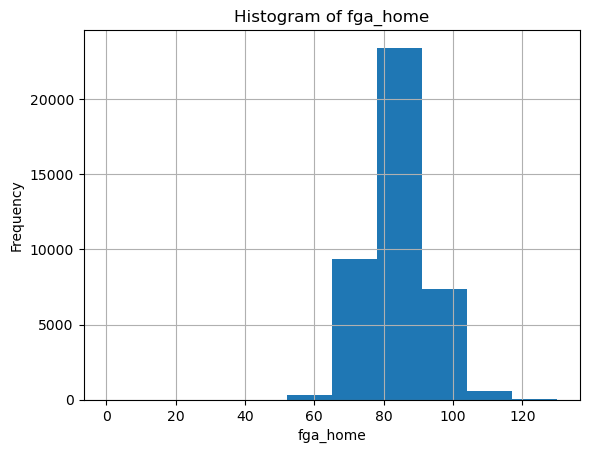

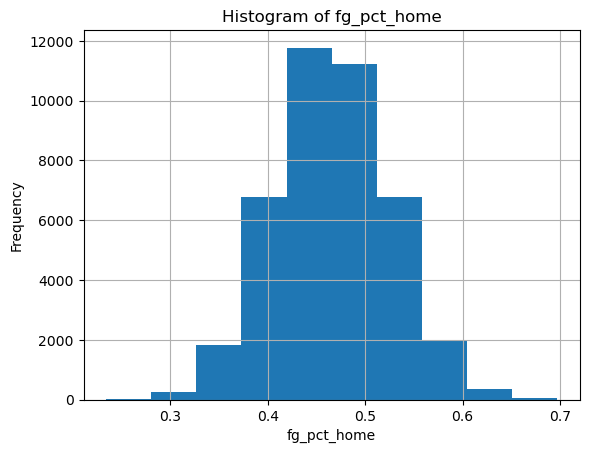

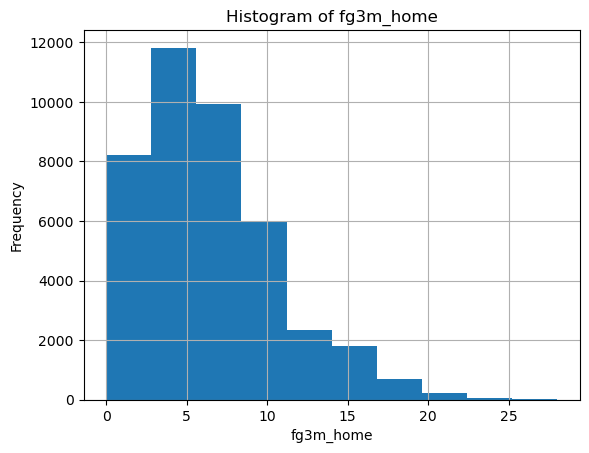

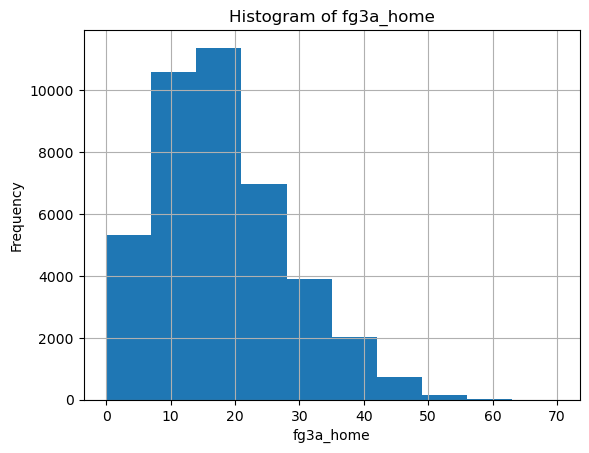

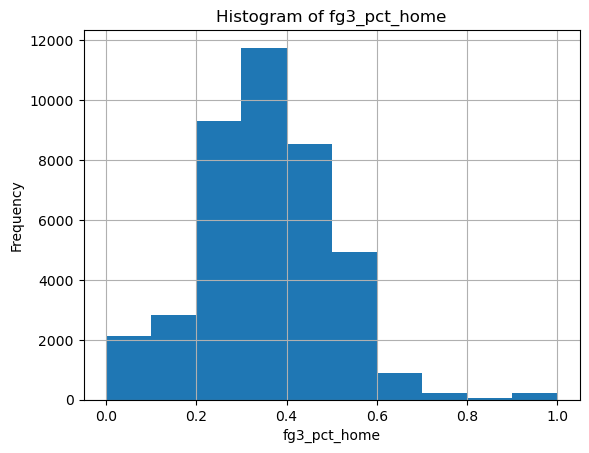

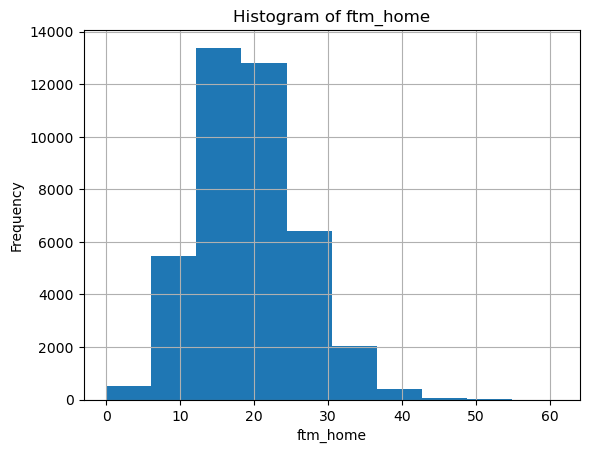

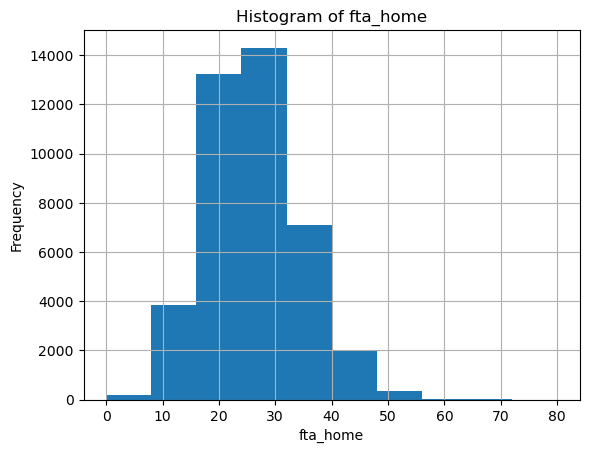

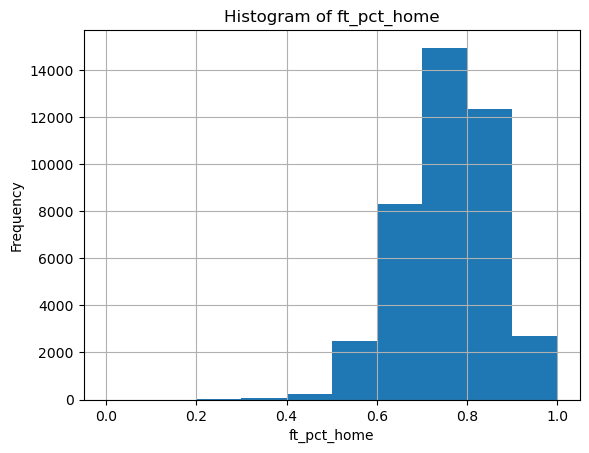

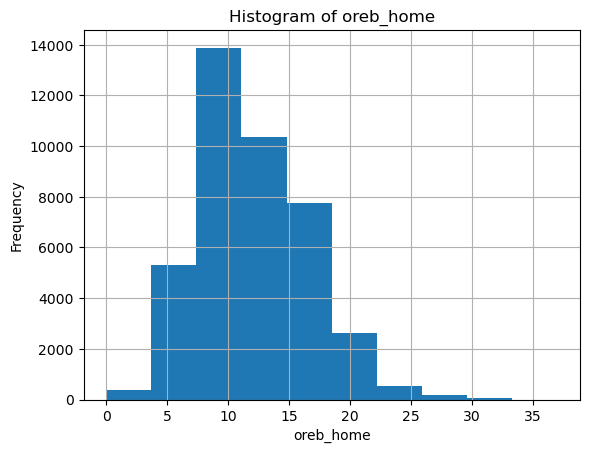

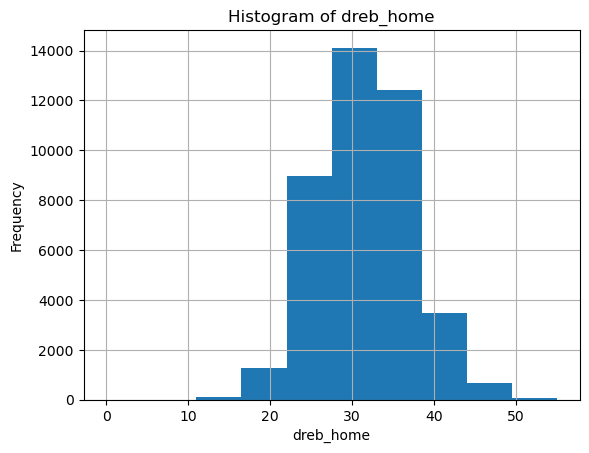

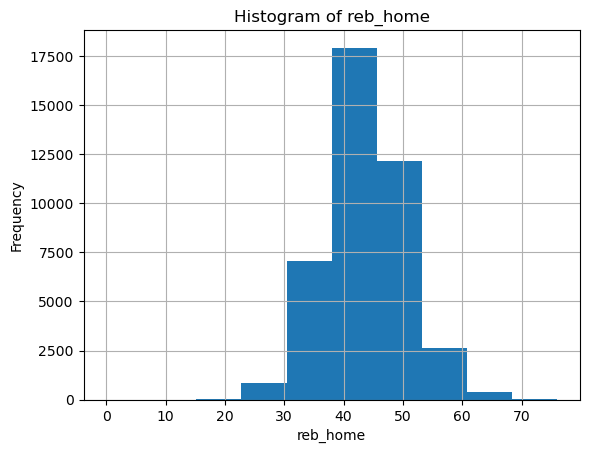

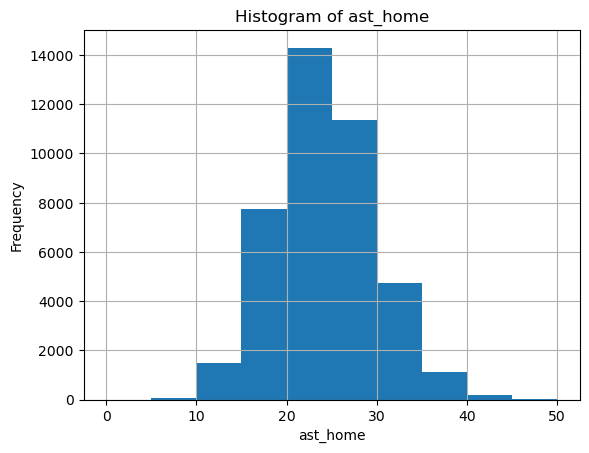

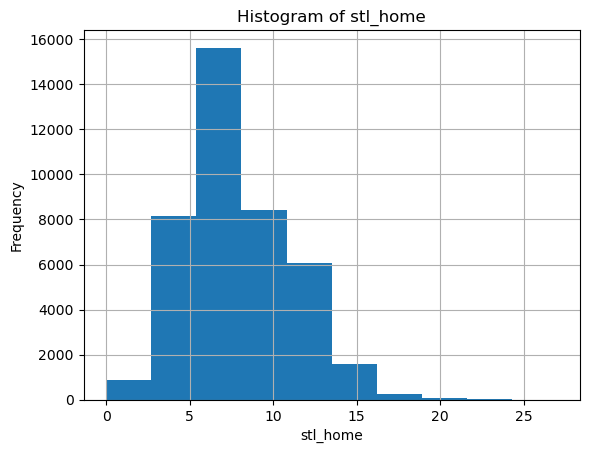

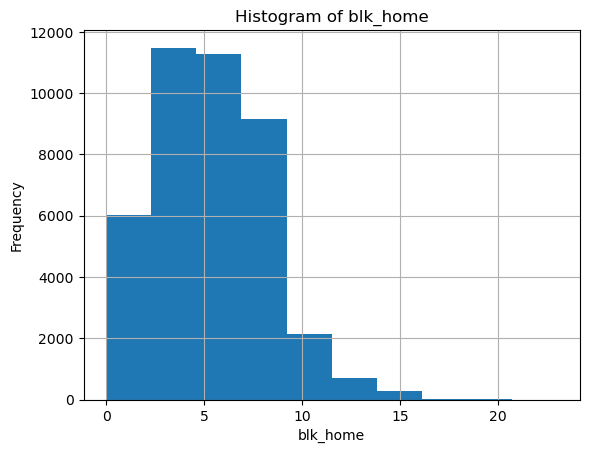

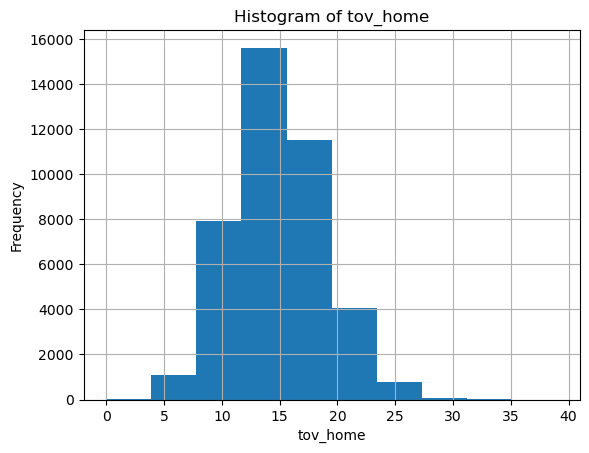

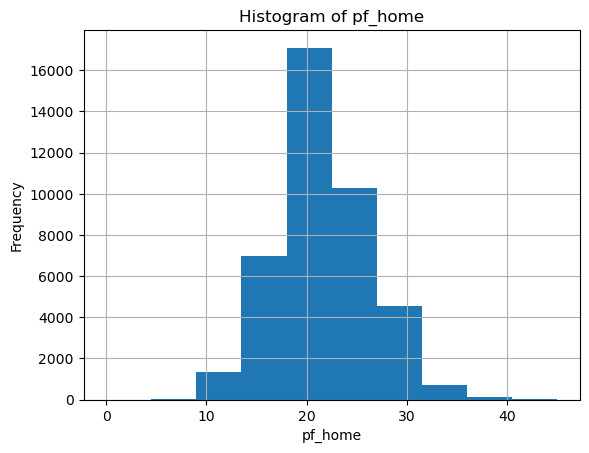

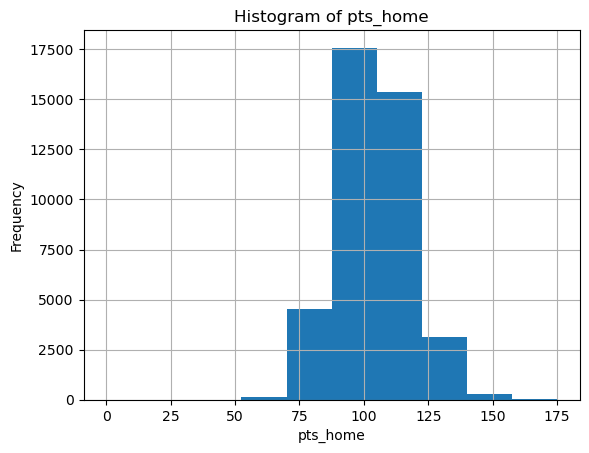

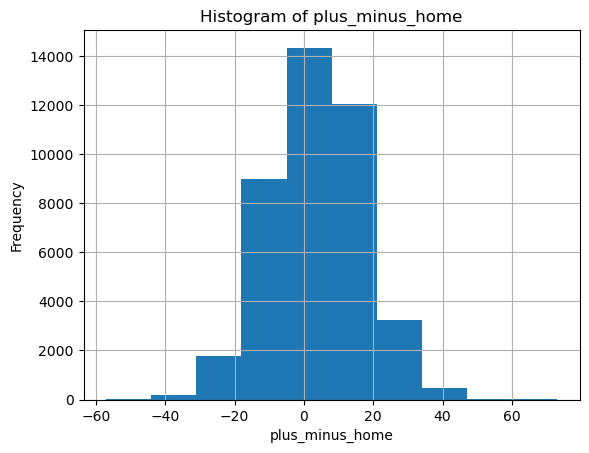

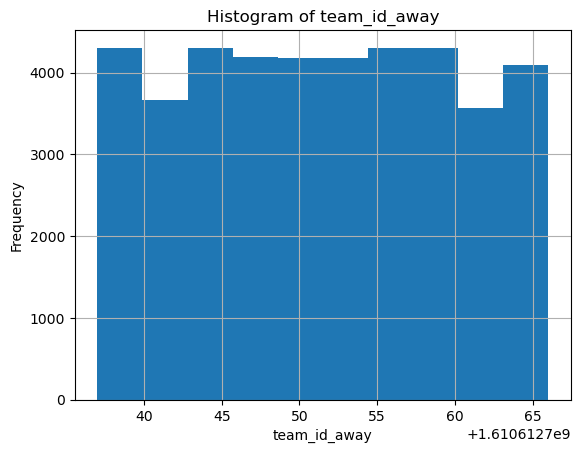

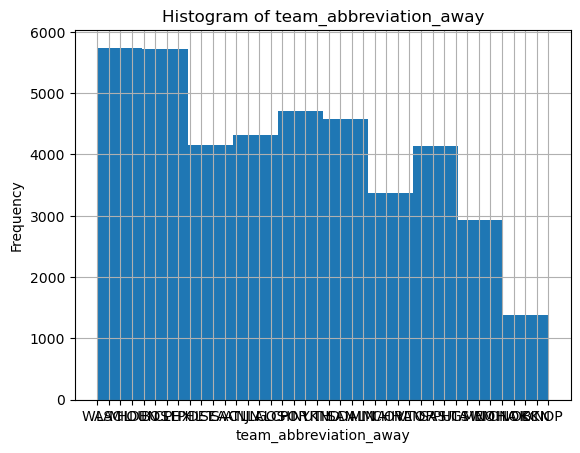

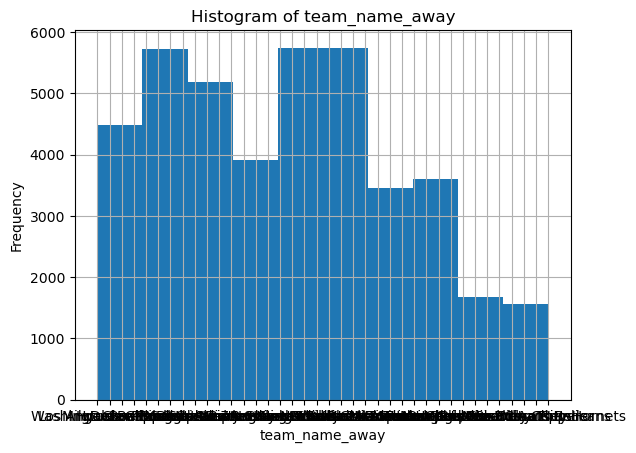

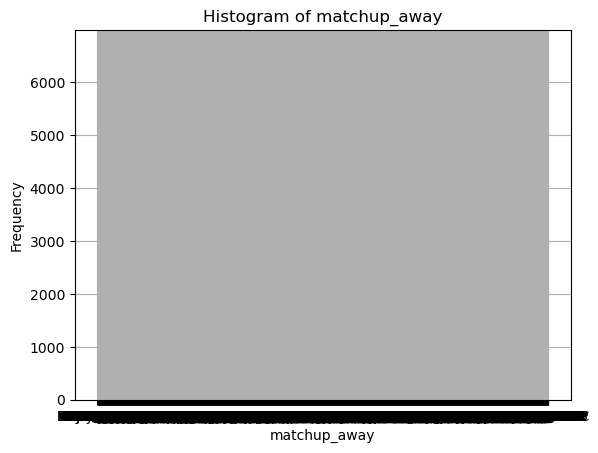

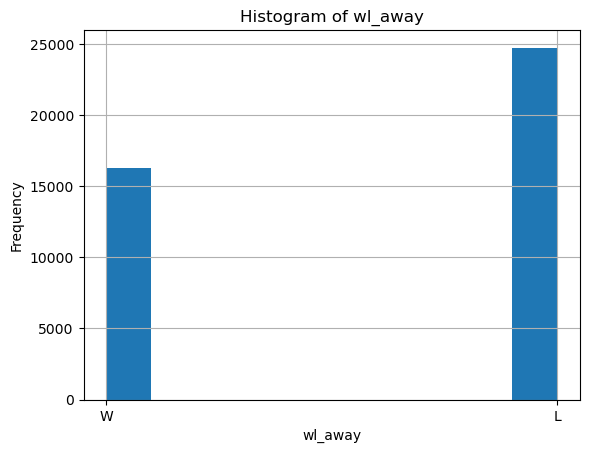

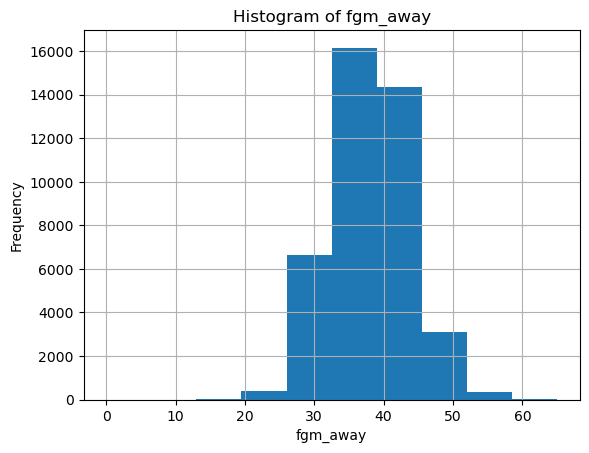

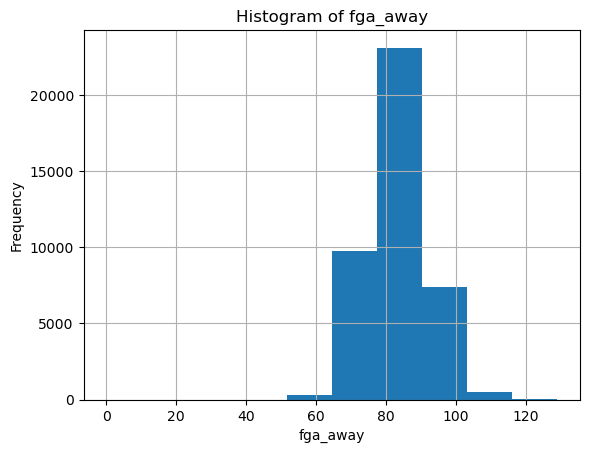

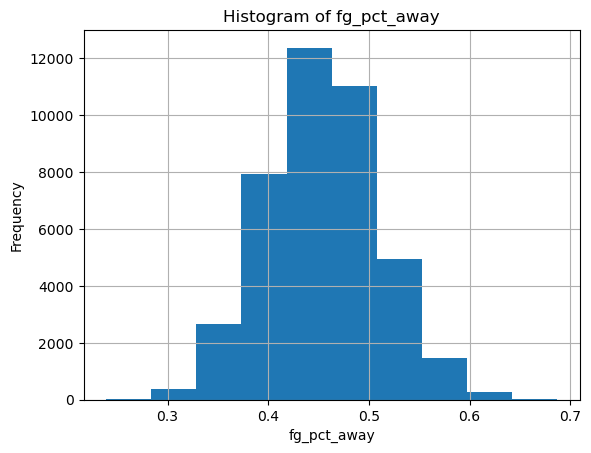

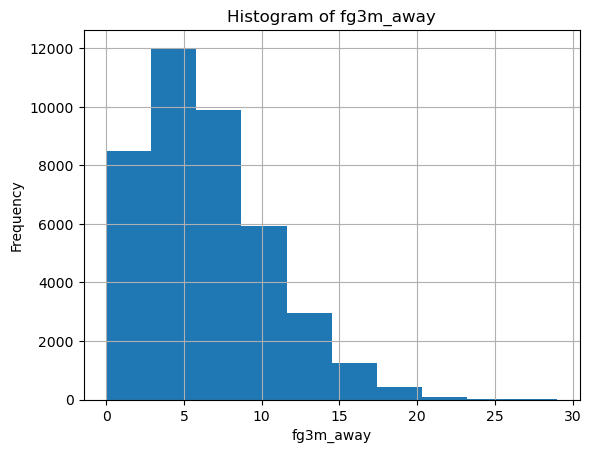

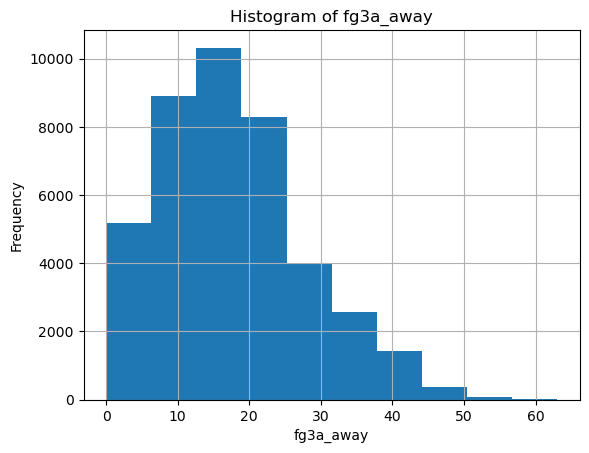

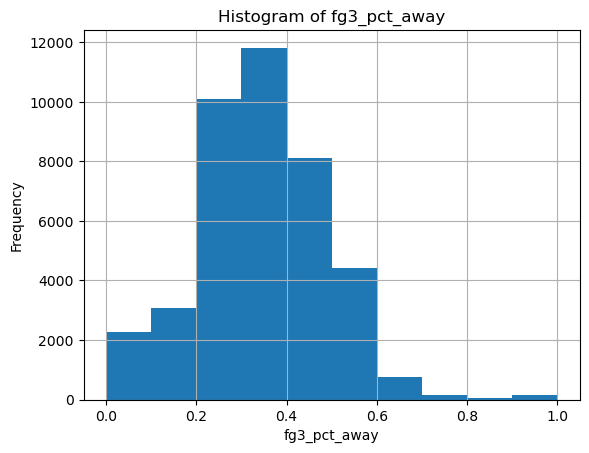

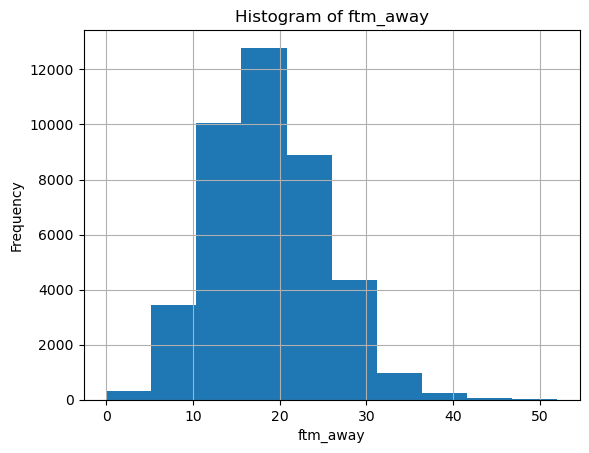

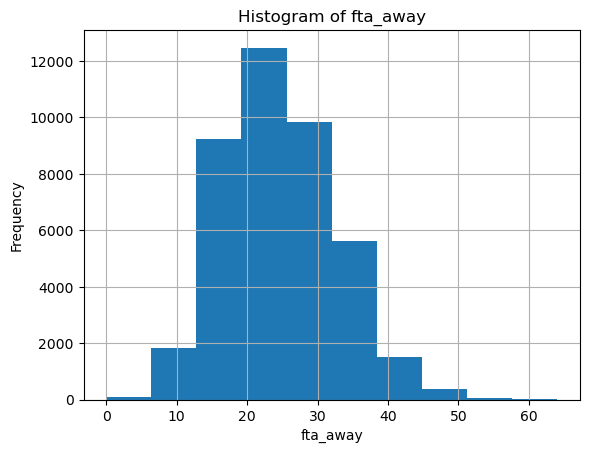

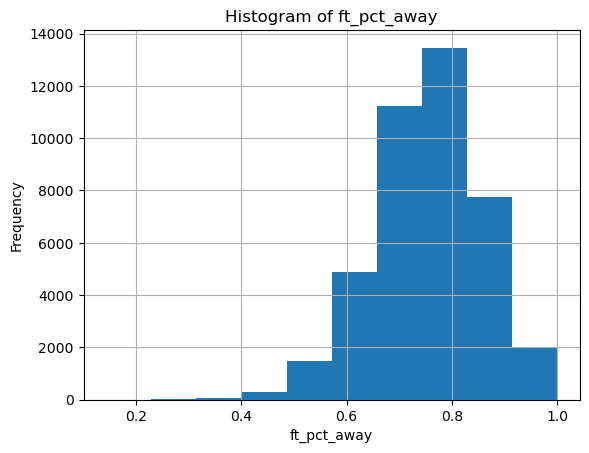

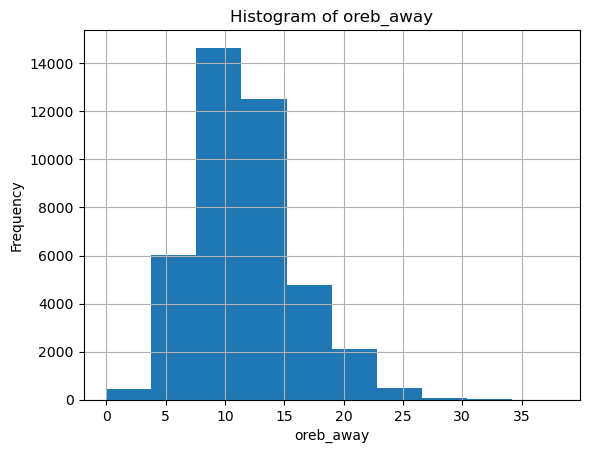

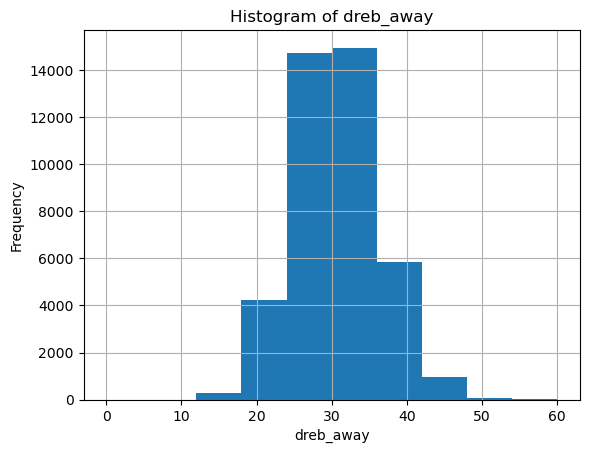

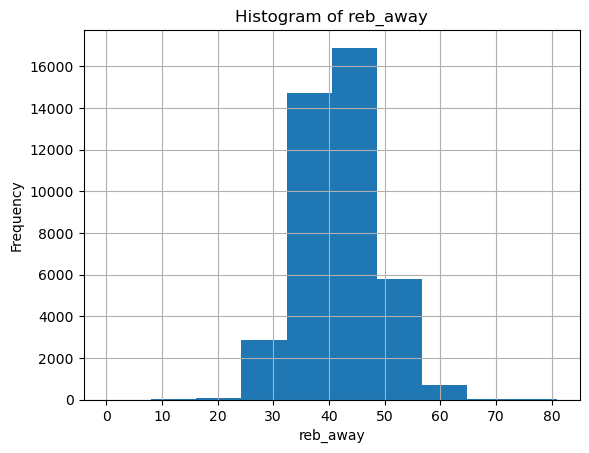

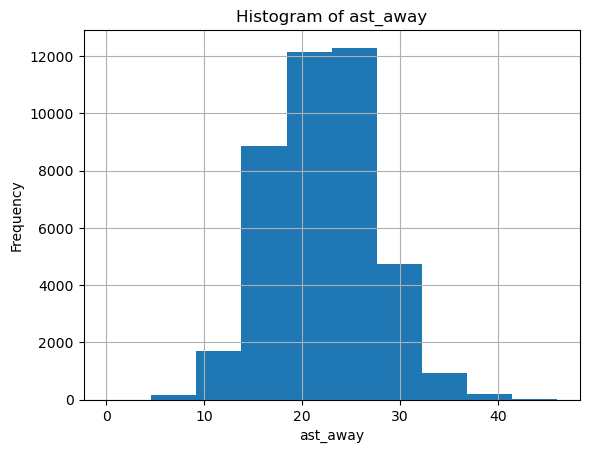

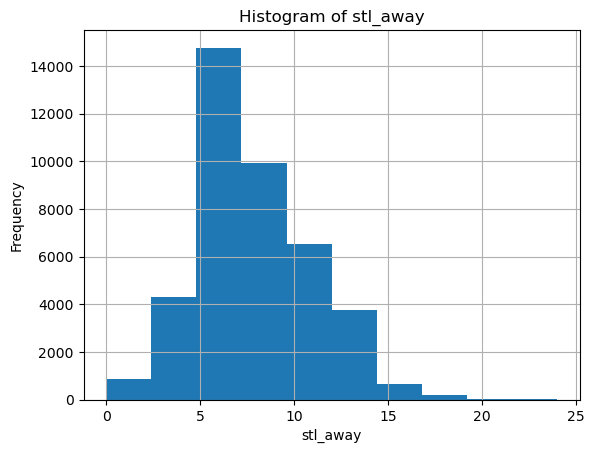

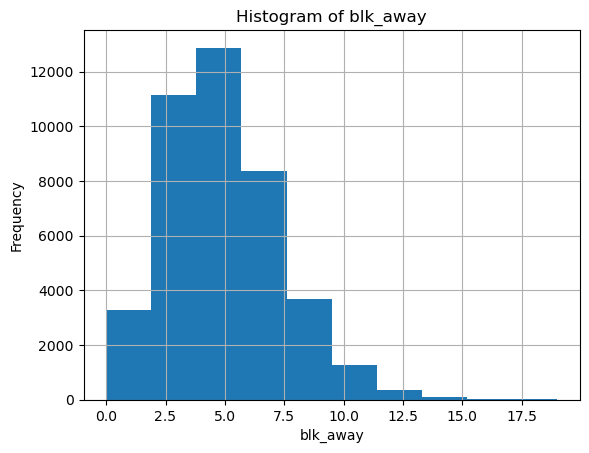

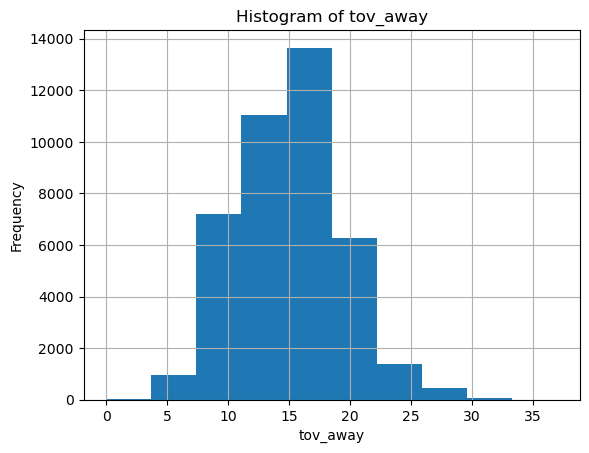

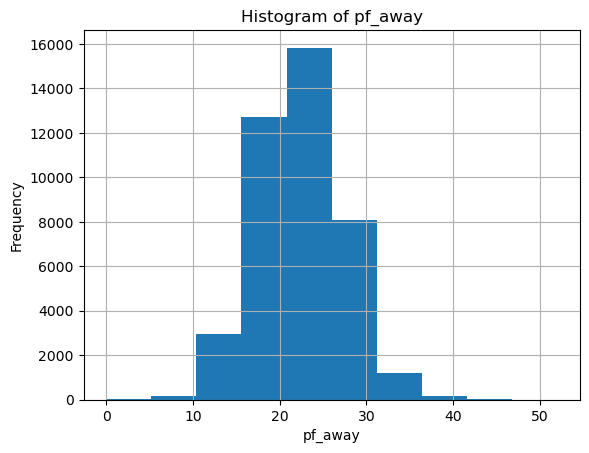

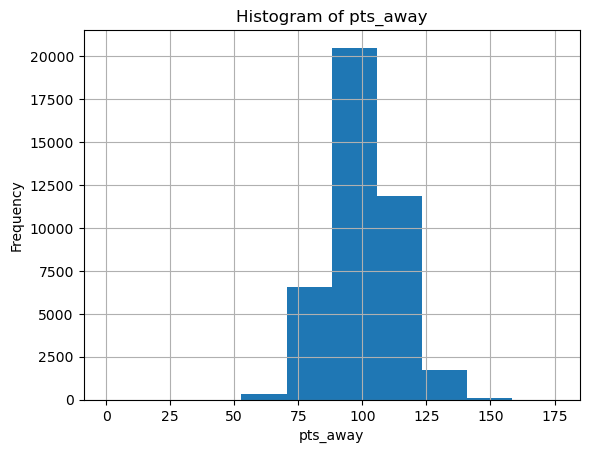

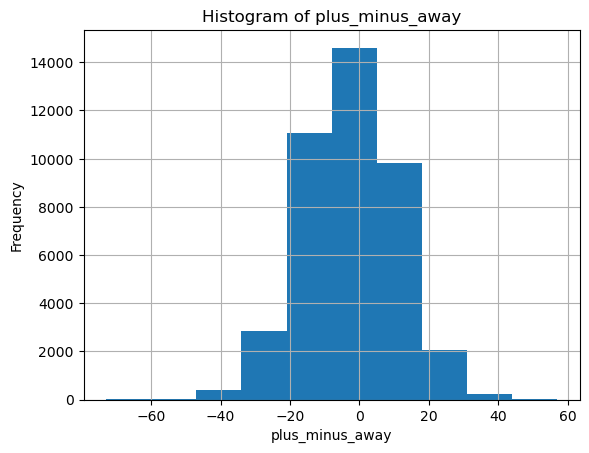

In [5]:
import matplotlib.pyplot as plt

for column in data.columns:
    # Generate a histogram for the current column
    data[column].hist()
    
    # Set the title and labels
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Display the histogram
    # Save the histogram   
    plt.savefig(f'plots/{column}.png')
    plt.show()

In [6]:
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler()
numerical_columns = ['min', 'fgm_home',
       'fga_home', 'fg_pct_home', 'fg3m_home', 'fg3a_home', 'fg3_pct_home',
       'ftm_home', 'fta_home', 'ft_pct_home', 'oreb_home', 'dreb_home',
       'reb_home', 'ast_home', 'stl_home', 'blk_home', 'tov_home', 'pf_home',
       'pts_home', 'plus_minus_home', 'fgm_away', 'fga_away', 'fg_pct_away', 'fg3m_away', 'fg3a_away',
       'fg3_pct_away', 'ftm_away', 'fta_away', 'ft_pct_away', 'oreb_away',
       'dreb_away', 'reb_away', 'ast_away', 'stl_away', 'blk_away', 'tov_away',
       'pf_away', 'pts_away', 'plus_minus_away']
for column in numerical_columns:
    # scaler = StandardScaler()
    # data[column] = scaler.fit_transform(data[column])
    data[column] = StandardScaler().fit_transform(data[column].values.reshape(-1, 1))
data

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,oreb_away,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away
21293,21985,1610612737,ATL,Atlanta Hawks,28500005,1985-10-25 00:00:00,ATL vs. WAS,L,-0.221392,0.368021,...,-0.170809,-0.206172,-0.282387,-0.182252,1.061924,0.925911,0.459025,-0.640995,-0.014952,0.925699
21294,21985,1610612758,SAC,Sacramento Kings,28500006,1985-10-25 00:00:00,SAC vs. LAC,L,-0.221392,0.023965,...,-0.170809,0.155320,0.020180,-0.562831,-0.275102,0.925911,0.697375,2.057188,0.590866,0.549189
21295,21985,1610612765,DET,Detroit Pistons,28500010,1985-10-25 00:00:00,DET vs. MIL,W,-0.221392,0.023965,...,0.299783,-0.386917,-0.131103,0.959487,0.727668,0.925911,1.174075,2.057188,1.196684,0.097375
21296,21985,1610612762,UTH,Utah Jazz,28500011,1985-10-25 00:00:00,UTH vs. HOU,L,-0.221392,0.540049,...,1.240968,-0.025426,0.776599,0.198328,0.727668,0.925911,0.935725,1.226977,0.893775,0.549189
21297,21985,1610612744,GOS,Golden State Warriors,28500008,1985-10-25 00:00:00,GOS vs. DEN,L,-0.221392,-0.492119,...,0.299783,0.155320,0.322748,0.769197,1.061924,-0.671957,1.650776,3.717608,1.423866,1.302210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62362,22022,1610612755,PHI,Philadelphia 76ers,22201016,2023-03-12 00:00:00,PHI vs. WAS,W,-0.221392,0.368021,...,-1.347291,-0.206172,-1.038806,-0.562831,-1.277872,0.126977,-1.209427,-0.433443,-0.545043,-1.182762
62363,22022,1610612759,SAS,San Antonio Spurs,22201018,2023-03-12 00:00:00,SAS vs. OKC,L,-0.221392,-1.008202,...,0.064487,2.324266,1.986868,0.769197,0.059154,-0.671957,-1.447777,-0.640995,0.136502,1.151606
62364,22022,1610612740,NOP,New Orleans Pelicans,22201017,2023-03-12 00:00:00,NOP vs. POR,W,-0.221392,0.712077,...,-0.406106,1.059047,0.625315,0.769197,0.727668,-1.071424,0.935725,-0.225890,0.742320,-1.032157
62365,22022,1610612747,LAL,Los Angeles Lakers,22201019,2023-03-12 00:00:00,LAL vs. NYK,L,-0.221392,0.712077,...,0.064487,0.697556,0.625315,-0.753121,0.059154,-0.671957,-0.971077,-0.848548,0.893775,0.549189
